# **[Alpha Vantage](https://www.alphavantage.co/documentation/) Normal Distribution?**
---

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20.0,10.0)

import seaborn as sb
sb.set()

from scipy import stats
from scipy.stats import norm

from alpha_vantage.timeseries import TimeSeries

In [2]:
stock = 'GOOG'
plot_range = 252

## Import Data via Alpha Vantage API and Clean

In [3]:
ts = TimeSeries(key = 'ALPHA_VANTAGE_API_KEY',output_format = 'pandas')
data, meta_data = ts.get_daily(symbol = stock, outputsize = 'full')

meta_data

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'GOOG',
 '3. Last Refreshed': '2022-03-04',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [4]:
data.head()

1. open    2. high    3. low  4. close  5. volume
date                                                          
2022-03-04  2667.650  2683.9800  2608.170   2642.44  1210343.0
2022-03-03  2719.570  2734.2759  2668.620   2686.16   988965.0
2022-03-02  2692.165  2712.3100  2668.650   2695.03  1198337.0
2022-03-01  2689.600  2722.2200  2667.570   2683.36  1231996.0
2022-02-28  2665.690  2712.8100  2656.505   2697.82  1483784.0

In [5]:
columns = ['open','high','low','close','volume']
data.columns = columns

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2000 entries, 2022-03-04 to 2014-03-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2000 non-null   float64
 1   high    2000 non-null   float64
 2   low     2000 non-null   float64
 3   close   2000 non-null   float64
 4   volume  2000 non-null   float64
dtypes: float64(5)
memory usage: 93.8 KB


## Calculate Rate of Return Separately 

In [6]:
rateOreturn = round(np.log(data.close).diff() * 100, 2)
rateOreturn.dropna(inplace = True)
rateOreturn.head()

date
2022-03-03    1.64
2022-03-02    0.33
2022-03-01   -0.43
2022-02-28    0.54
2022-02-25   -0.28
Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

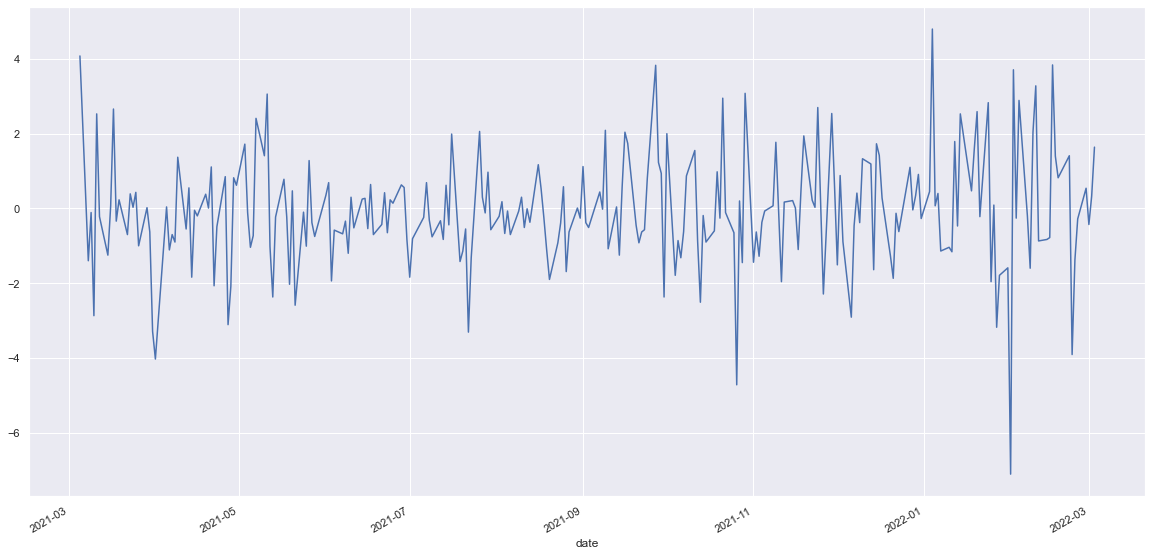

In [7]:
rateOreturn[:plot_range].plot()

## Descriptive Statistics 

In [8]:
# basic 
rateOreturn.describe()

count    1999.000000
mean       -0.077804
std         1.646815
min       -14.890000
25%        -0.880000
50%        -0.100000
75%         0.630000
max        11.770000
Name: close, dtype: float64

In [9]:
# Scipy Stats
n, minmax, mean, var, skew, kurt = stats.describe(rateOreturn)
mini, maxi = minmax
std = var ** .5
print(f"count: {n}\n" f"mean: {mean}\n" f"std: {std}\n")
print(f"min: {mini}\n" f"max: {maxi}\n"f"minmax: {minmax}\n")
print(f"var: {var}\n" f"skew: {skew}\n" f"kurt: {kurt}\n")

count: 1999
mean: -0.0778039019509755
std: 1.6468146307319398

min: -14.89
max: 11.77
minmax: (-14.89, 11.77)

var: 2.711998427992775
skew: -0.216429938915099
kurt: 8.223697670782979



---
## Plotting
---
#### Generate Random Numbers Following a Normal Distribution 

In [10]:
# Generate Random Numbers Following a Normal Distribution 
x = norm.rvs(mean,std,n)
stats.describe(x)

DescribeResult(nobs=1999, minmax=(-5.109259422652731, 4.40140282258627), mean=-0.07801331747710469, variance=2.7563181098953304, skewness=-0.08850519641673404, kurtosis=-0.3233892060398409)

(array([  5.,  19.,  40.,  88., 120., 194., 270., 271., 284., 249., 206.,
        143.,  70.,  25.,  15.]),
 array([-5.10925942, -4.47521527, -3.84117112, -3.20712697, -2.57308282,
        -1.93903867, -1.30499452, -0.67095037, -0.03690623,  0.59713792,
         1.23118207,  1.86522622,  2.49927037,  3.13331452,  3.76735867,
         4.40140282]),
 <BarContainer object of 15 artists>)

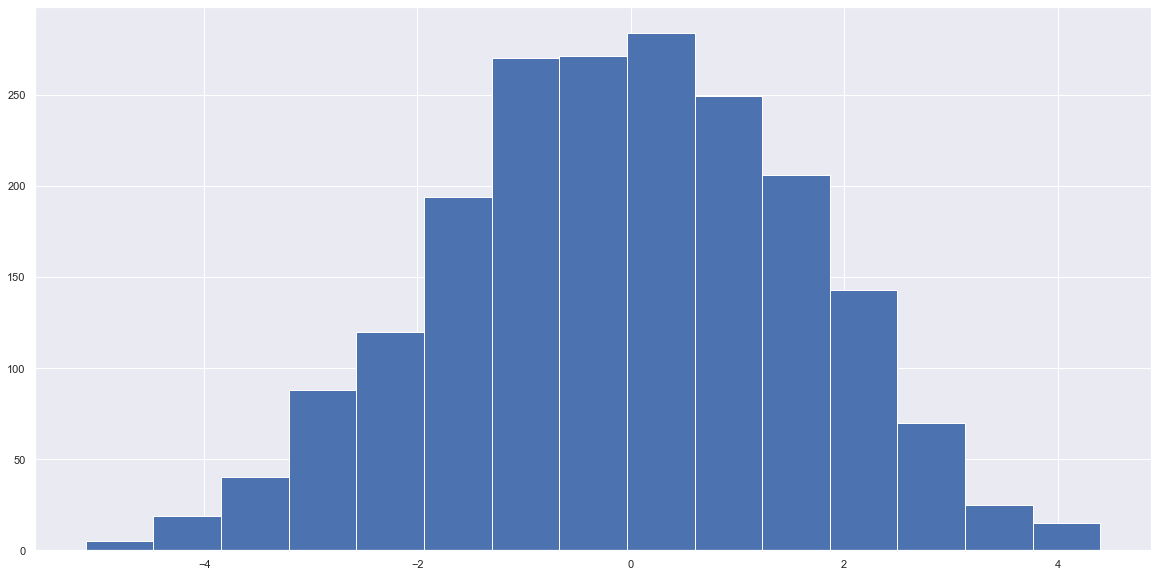

In [11]:
plt.hist(x, bins=15)

#### Plot Rate of Return Calculuated Above

(-6.0, 6.0)

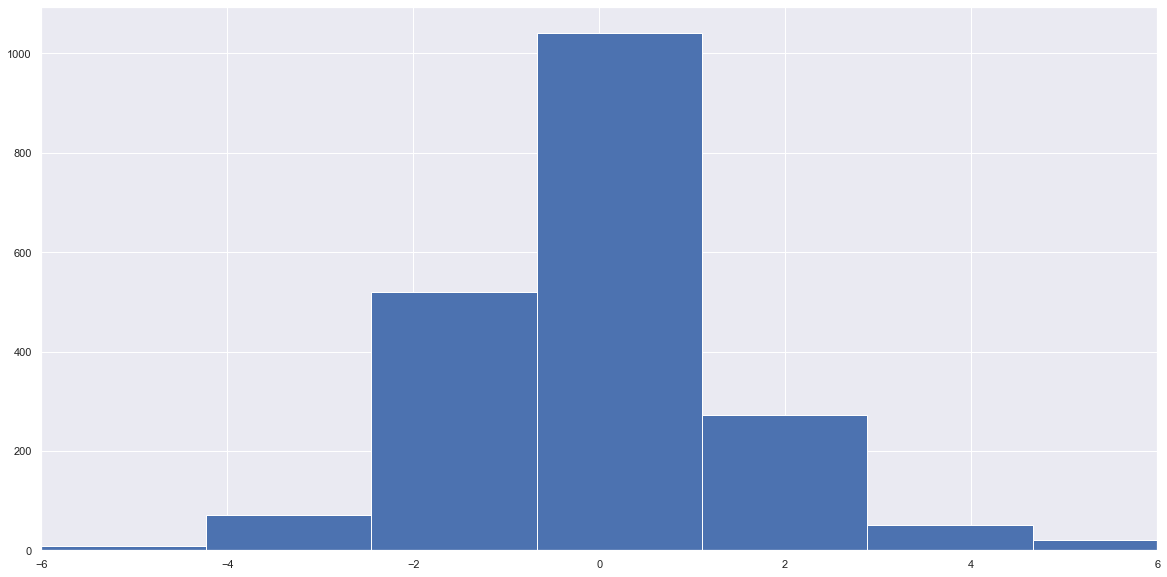

In [12]:
plt.hist(rateOreturn, bins = 15)
plt.xlim(-6,6)

### Price Change Normally Distributed? 

In [13]:
x_test = stats.kurtosistest(x)
data_test = stats.kurtosistest(rateOreturn)
print(f'{"     Test Statistic" :20}{"p-value" :>15}')
print(f'{" " *5}{"-" *30}')
print(f'x:{x_test[0]:>17.2f}{x_test[1]:16.4f}')
print(f'{stock}: {data_test[0]:13.2f}{data_test[1]:16.4f}')

     Test Statistic         p-value
     ------------------------------
x:            -3.47          0.0005
GOOG:         17.89          0.0000


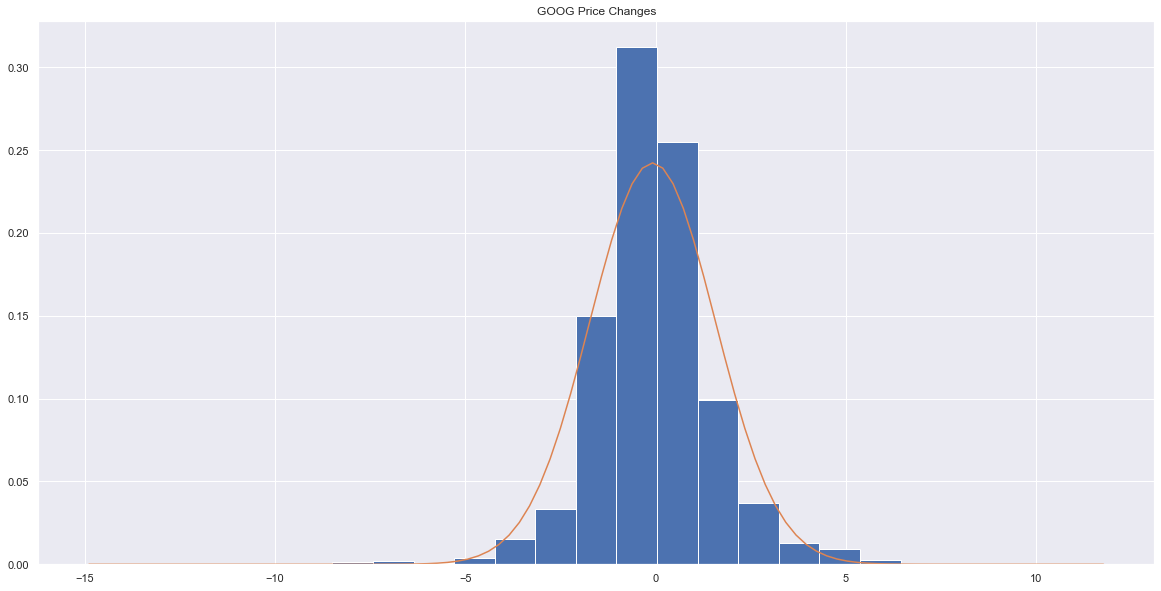

In [14]:
# Plot Histogram of Stock Price Changes with Normal Curve Overlay 
plt.hist(rateOreturn, bins = 25, edgecolor = 'w', density = True)
hist_data = np.linspace(mini,maxi,100)
plt.plot(hist_data, norm.pdf(hist_data, mean, std))
plt.title(f'{stock} Price Changes');

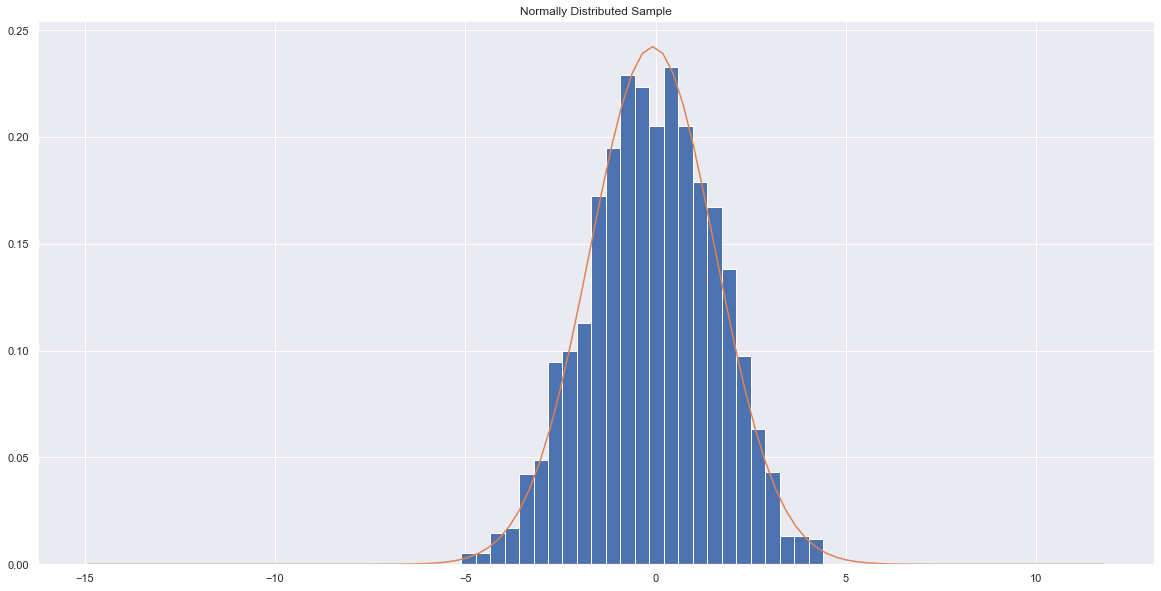

In [15]:
# Compare Normally Distributed Sample 
plt.hist(x, bins = 25, density = True)
b = np.linspace(mini,maxi,100)
plt.plot(b,stats.norm.pdf(b,mean,std))
plt.title(f'Normally Distributed Sample');

In [16]:
# Is daily price change significantly different from zero?
stats.ttest_1samp(rateOreturn.sample(252), 0, alternative = 'two-sided')

Ttest_1sampResult(statistic=-1.142092628522347, pvalue=0.25450383954170147)

---
## Random Walk
---

In [17]:
# create price lags
data_close = pd.DataFrame(data.close, columns=['close'])
data_close['lag_1'] = data_close.close.shift(1)
data_close['lag_2'] = data_close.close.shift(2)
data_close.dropna(inplace = True)

data_close

close    lag_1    lag_2
date                                 
2022-03-02  2695.03  2686.16  2642.44
2022-03-01  2683.36  2695.03  2686.16
2022-02-28  2697.82  2683.36  2695.03
2022-02-25  2690.39  2697.82  2683.36
2022-02-24  2653.47  2690.39  2697.82
...             ...      ...      ...
2014-04-02   567.00   569.74   543.14
2014-04-01   567.16   567.00   569.74
2014-03-31   556.97   567.16   567.00
2014-03-28   559.99   556.97   567.16
2014-03-27   558.46   559.99   556.97

[1998 rows x 3 columns]

In [18]:
linearRegression = np.linalg.lstsq(data_close[['lag_1', 'lag_2']], data_close.close, rcond=None)[0]
data_close['predict'] = np.dot(data_close[['lag_1', 'lag_2']], linearRegression)
data_close

close    lag_1    lag_2      predict
date                                              
2022-03-02  2695.03  2686.16  2642.44  2680.068678
2022-03-01  2683.36  2695.03  2686.16  2691.364210
2022-02-28  2697.82  2683.36  2695.03  2681.142875
2022-02-25  2690.39  2697.82  2683.36  2693.760389
2022-02-24  2653.47  2690.39  2697.82  2687.868609
...             ...      ...      ...          ...
2014-04-02   567.00   569.74   543.14   567.237096
2014-04-01   567.16   567.00   569.74   566.550673
2014-03-31   556.97   567.16   567.00   566.507820
2014-03-28   559.99   556.97   567.16   557.052665
2014-03-27   558.46   559.99   556.97   559.146047

[1998 rows x 4 columns]

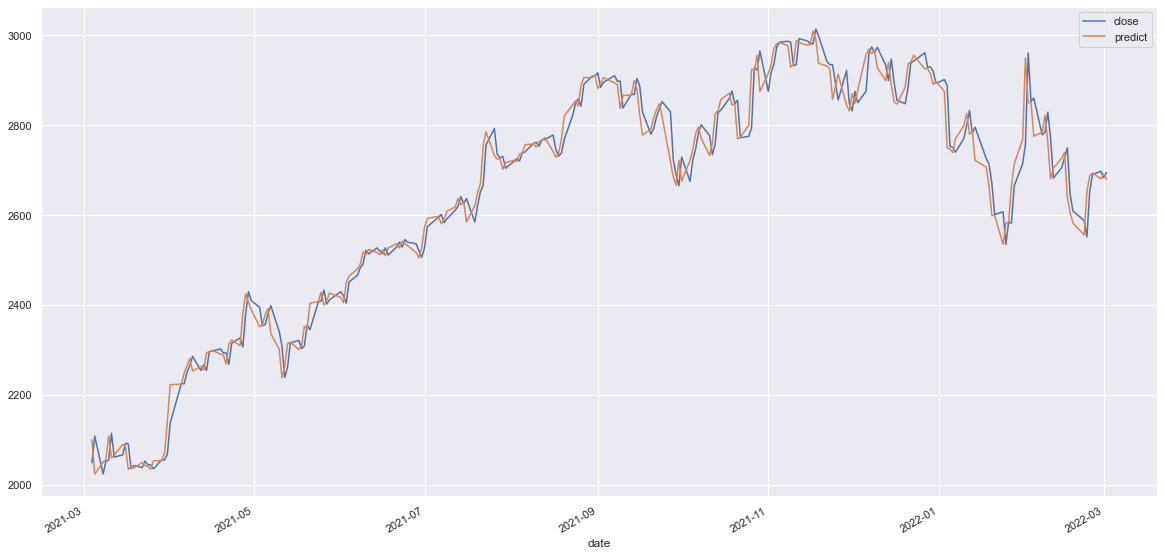

In [19]:
data_close.iloc[:plot_range][['close','predict']].plot();